<a href="https://colab.research.google.com/github/tanishqkhandelwal/Age-Classification/blob/master/age_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip UTKFace_all.zip

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import fnmatch
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import math
from keras.utils import np_utils


In [0]:
print (len(os.listdir('UTKFace')))

23708


In [0]:
image=[]

for file in os.listdir("UTKFace"):
    if fnmatch.fnmatch(file, '*.jpg'):
        image.append(file)


In [0]:
y_train=[]
for i in image:
    y_train.append(re.split('\_', i)[0])
    
y_train_arr=np.array(y_train)

In [0]:
from tensorflow.python.keras.utils import to_categorical
y = to_categorical(y_train_arr)


In [0]:
IM=[]
from PIL import Image

for i in image:
    flocation="UTKFace/%s"%(i)
    img = Image.open(flocation)    
    arr = np.array(img)
    IM.append(arr)
    
    
IMA=np.array(IM)

In [0]:
#Plotting Images

def plot_images(images, cls_true, cls_pred=None, smooth=True):

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = cls_true[i]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = cls_pred[i]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

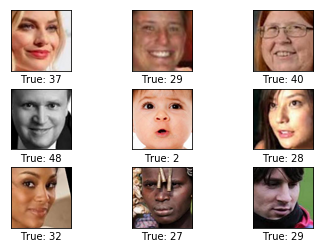

In [0]:
# Get the first 9 images from the test-set.
images = IMA[0:9]

# Get the true classes for those images.
cls_true = y_train_arr[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images, cls_true)


In [0]:
from tensorflow.python.keras.layers import Input, Dense, Activation
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten

In [0]:
model = Sequential()


model.add(Conv2D(96, kernel_size=(7,7), activation='relu', input_shape=(200,200,3), padding='same', name='layer_conv1'))

model.add(MaxPooling2D(pool_size=(2,2), strides = 2))

model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(5,5), activation='relu', padding='same', name='layer_conv2'))

model.add(MaxPooling2D(pool_size=(2,2), strides = 2))

model.add(BatchNormalization())

model.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu', name='layer_conv3'))

model.add(MaxPooling2D(pool_size=(2,2), strides = 2))

model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512, activation='relu'))

#model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))

#model.add(Dropout(0.5))

model.add(Dense(117, activation='softmax'))

In [0]:
from tensorflow.python.keras.optimizers import Adam

optimizer = Adam(lr=1e-6)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
print (IMA.shape)
print (y.shape)

(23708, 200, 200, 3)
(23708, 117)


In [0]:
model.fit(x=IMA,
          y=y,
          validation_split = 0.2,
          epochs=10, 
          batch_size=64)

Train on 18966 samples, validate on 4742 samples
Epoch 1/10
18966/18966 [==============================] - 420s 22ms/sample - loss: 4.3134 - acc: 0.1093 - val_loss: 4.0249 - val_acc: 0.1356
Epoch 2/10
18966/18966 [==============================] - 416s 22ms/sample - loss: 3.8126 - acc: 0.1450 - val_loss: 3.8705 - val_acc: 0.1434
Epoch 3/10
18966/18966 [==============================] - 417s 22ms/sample - loss: 3.5563 - acc: 0.1733 - val_loss: 3.7961 - val_acc: 0.1419
Epoch 4/10
18966/18966 [==============================] - 419s 22ms/sample - loss: 3.3452 - acc: 0.2037 - val_loss: 3.7433 - val_acc: 0.1482
Epoch 5/10
18944/18966 [============================>.] - ETA: 0s - loss: 3.1534 - acc: 0.2435

In [0]:
test = IMA[:9]

pred_y = model.predict(test)
pred_cls = np.argmax(pred_y, axis=1)

# Get the first 9 images from the test-set.
images = test

# Get the true classes for those images.
cls_true = y_train_arr[0:9]

#Get Predicted Classes
cls_pred = pred_cls
cls_pred = cls_pred.tolist()

# Plot the images and labels using our helper-function above.
plot_images(images, cls_true, cls_pred)



In [0]:

for name, value in zip(model.metrics_names, result):
    print(name, value)

NameError: ignored